In [1]:
import glob, h5py, math, time, os, json
from scipy.stats import norm, expon, chi2, uniform, chisquare
import numpy as np
from scipy.spatial.distance import pdist

import matplotlib as mpl
import matplotlib.pyplot as plt
import matplotlib.font_manager as font_manager
plt.rcParams["font.family"] = "serif"
plt.style.use('classic')
font = font_manager.FontProperties(family='serif', size=16)

In [9]:
folders = {
    's_2': './Higgs_Discovery_PMDNN_models/s_2/plots/',
    's_4': './Higgs_Discovery_PMDNN_models/s_4/plots/',
    's_8': './Higgs_Discovery_PMDNN_models/s_8/plots/',  
    's_16': './Higgs_Discovery_PMDNN_models/s_16/plots/',
    's_32': './Higgs_Discovery_PMDNN_models/s_32/plots/',
    'h_2': './Higgs_Discovery_PMDNN_models/h_2/plots/',
    'h_4': './Higgs_Discovery_PMDNN_models/h_4/plots/',
    'h_8': './Higgs_Discovery_PMDNN_models/h_8/plots/',
    'h_16': './Higgs_Discovery_PMDNN_models/h_16/plots/',
    'h_32': './Higgs_Discovery_PMDNN_models/h_32/plots/',
    'r_2': './Higgs_Discovery_PMDNN_models/r_2/plots/',
    'r_4': './Higgs_Discovery_PMDNN_models/r_4/plots/',
    'r_16': './Higgs_Discovery_PMDNN_models/r_16/plots/',
    'r_8_h_8': './Higgs_Discovery_PMDNN_models/r_8_h_8/plots/',
}

labels_physics = ['QCD','Hbb','Hcc','Hgg','H4q','Hqql','Zqq','Wqq','Tbqq','Tbl']

In [8]:
data= {}
for k1 in list(folders.keys()):
    data[k1]= {}
    for file in glob.glob(folders[k1]+'/*.npz'):
        filename = file.split('/')[-1].replace('.npz', '')
        data[k1][filename]= {}
        file_load = np.load(file)
        for k2 in file_load.files:
            data[k1][filename][k2] = file_load[k2]
            print(k1, filename, k2, data[k1][filename][k2].shape)

s_2 inputs inputs (100000, 25, 10)
s_2 inputs labels (100000,)
s_2 PoincareBall latent (100000, 2)
s_2 labels labels (100000,)
s_4 inputs inputs (100000, 25, 10)
s_4 inputs labels (100000,)
s_4 SphereProjection latent (100000, 4)
s_4 labels labels (100000,)
s_8 inputs inputs (100000, 25, 10)
s_8 inputs labels (100000,)
s_8 SphereProjection latent (100000, 8)
s_8 labels labels (100000,)
s_16 inputs inputs (100000, 25, 10)
s_16 inputs labels (100000,)
s_16 SphereProjection latent (100000, 16)
s_16 labels labels (100000,)
s_32 inputs inputs (100000, 25, 10)
s_32 inputs labels (100000,)
s_32 SphereProjection latent (100000, 32)
s_32 labels labels (100000,)
h_2 inputs inputs (100000, 25, 10)
h_2 inputs labels (100000,)
h_2 PoincareBall latent (100000, 2)
h_2 labels labels (100000,)
h_4 inputs inputs (100000, 25, 10)
h_4 inputs labels (100000,)
h_4 PoincareBall latent (100000, 4)
h_4 labels labels (100000,)
h_8 inputs inputs (100000, 25, 10)
h_8 inputs labels (100000,)
h_8 PoincareBall laten

# plot all classes

In [10]:
labels_tests = [str(i) for i in range(10)]
colors= [
    '#d53e4f',
'#f46d43',
'#fdae61',
'#fee08b',
'#e6f598',
'#abdda4',
'#66c2a5',
'#3288bd',
'darkblue',
    'black'
]

### Euclidean geometry

In [ ]:
manifold = 'r_2'
geom = 'Euclidean'
fig  = plt.figure(figsize=(26, 20))
fig.patch.set_facecolor('white')
N = 5000
y = data[manifold]['labels']['labels'][:N]
for i in range(data[manifold][geom]['latent'].shape[1]):
    x_i = data[manifold][geom]['latent'][:N, i]
    for j in range(data[manifold][geom]['latent'].shape[1]):
        if j>i:
            x_j = data[manifold][geom]['latent'][:N, j]
            ax= fig.add_axes([0.05+i*0.12, 0.05+j*0.12, 0.10, 0.10])
            plt.yticks(fontsize=11, fontname='serif')
            plt.xticks(fontsize=11, fontname='serif')
            for l in labels_tests:
                plt.scatter(x_i[y==int(l)], x_j[y==int(l)], c=colors[int(l)], s=50,
                   )
        elif i==j:
            ax= fig.add_axes([0.05+i*0.12, 0.05+j*0.12, 0.1, 0.1])
            bins = np.linspace(np.min(x_i), np.max(x_i), 20)
            for l in labels_tests:
                plt.hist(x_i[y==int(l)], density=True,
                         histtype='step', lw=2, 
                         color=colors[int(l)],bins=bins, label='%s'%(labels_physics[int(l)]))
            plt.legend(prop=font, ncol=2, bbox_to_anchor=(2.8, 0.95), bbox_transform=ax.transAxes)
        else: continue
plt.savefig('./%s_%s_latent.png'%(manifold, geom))
plt.show()

### Spherical geometry

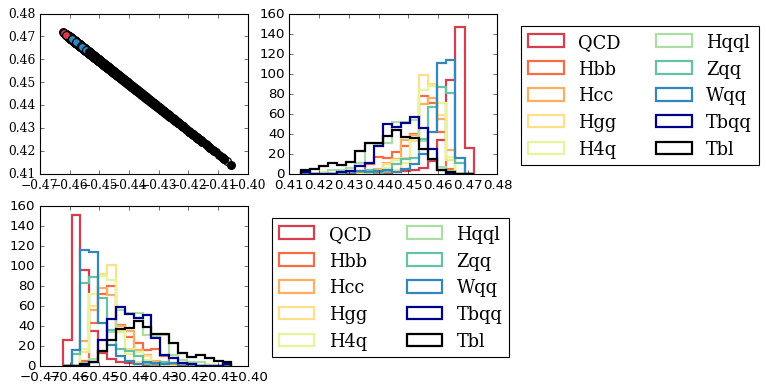

In [45]:
manifold = 's_2'
geom = 'PoincareBall'
fig  = plt.figure(figsize=(26, 20))
fig.patch.set_facecolor('white')
N = 5000
y = data[manifold]['labels']['labels'][:N]
for i in range(data[manifold][geom]['latent'].shape[1]):
    x_i = data[manifold][geom]['latent'][:N, i]
    for j in range(data[manifold][geom]['latent'].shape[1]):
        if j>i:
            x_j = data[manifold][geom]['latent'][:N, j]
            ax= fig.add_axes([0.05+i*0.12, 0.05+j*0.12, 0.10, 0.10])
            plt.yticks(fontsize=11, fontname='serif')
            plt.xticks(fontsize=11, fontname='serif')
            for l in labels_tests:
                plt.scatter(x_i[y==int(l)], x_j[y==int(l)], c=colors[int(l)], s=50,
                   )
        elif i==j:
            ax= fig.add_axes([0.05+i*0.12, 0.05+j*0.12, 0.1, 0.1])
            bins = np.linspace(np.min(x_i), np.max(x_i), 20)
            for l in labels_tests:
                plt.hist(x_i[y==int(l)], density=True,
                         histtype='step', lw=2, 
                         color=colors[int(l)],bins=bins, label='%s'%(labels_physics[int(l)]))
            plt.legend(prop=font, ncol=2, bbox_to_anchor=(2.3, 0.98), bbox_transform=ax.transAxes)
        else: continue
plt.savefig('./higgsAD_%s_%s_latent.png'%(manifold, geom))
plt.show()

### hyperbolic geometry

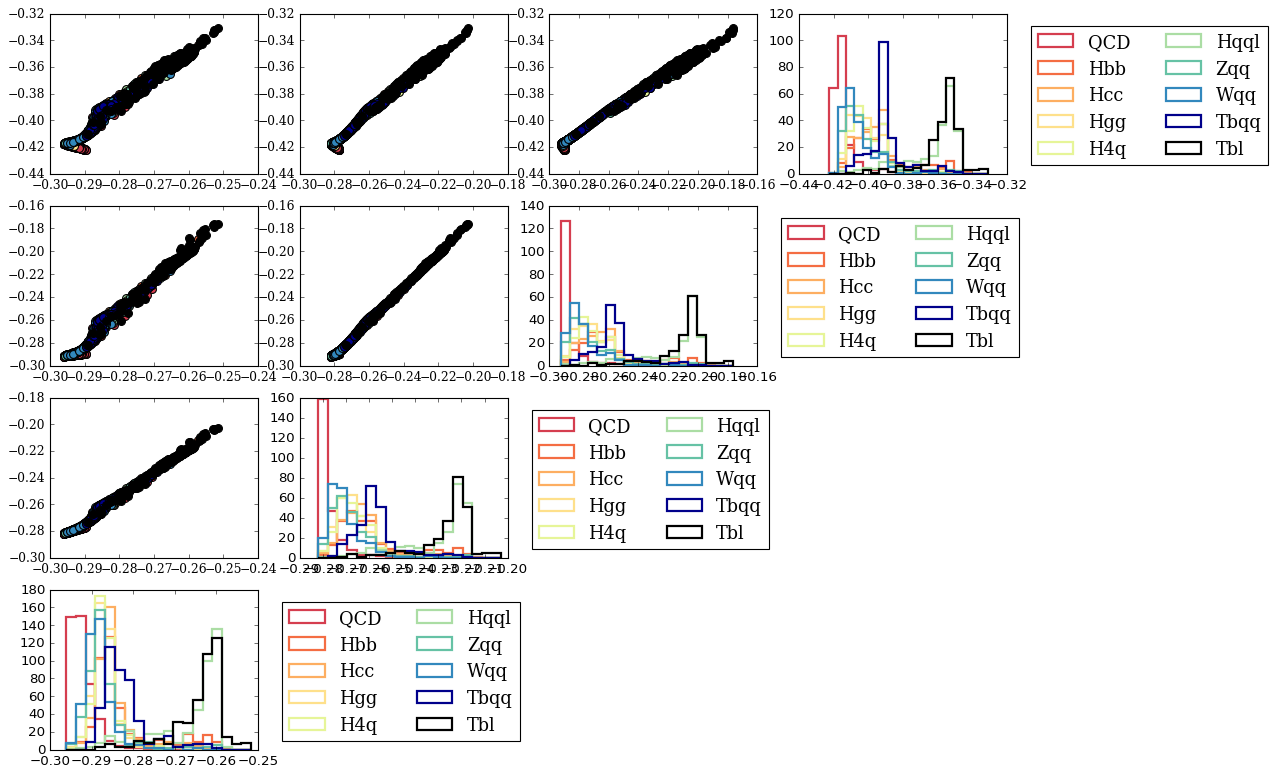

In [48]:
manifold = 'h_4'
geom = 'PoincareBall'
fig  = plt.figure(figsize=(26, 20))
fig.patch.set_facecolor('white')
N = 5000
y = data[manifold]['labels']['labels'][:N]
for i in range(data[manifold][geom]['latent'].shape[1]):
    x_i = data[manifold][geom]['latent'][:N, i]
    for j in range(data[manifold][geom]['latent'].shape[1]):
        if j>i:
            x_j = data[manifold][geom]['latent'][:N, j]
            ax= fig.add_axes([0.05+i*0.12, 0.05+j*0.12, 0.10, 0.10])
            plt.yticks(fontsize=11, fontname='serif')
            plt.xticks(fontsize=11, fontname='serif')
            for l in labels_tests:
                plt.scatter(x_i[y==int(l)], x_j[y==int(l)], c=colors[int(l)], s=50,
                   )
        elif i==j:
            ax= fig.add_axes([0.05+i*0.12, 0.05+j*0.12, 0.1, 0.1])
            bins = np.linspace(np.min(x_i), np.max(x_i), 20)
            for l in labels_tests:
                plt.hist(x_i[y==int(l)], density=True,
                         histtype='step', lw=2, 
                         color=colors[int(l)],bins=bins, label='%s'%(labels_physics[int(l)]))
            plt.legend(prop=font, ncol=2, bbox_to_anchor=(2.3, 0.98), bbox_transform=ax.transAxes)
        else: continue
plt.savefig('./higgsAD_%s_%s_latent.png'%(manifold, geom))
plt.show()

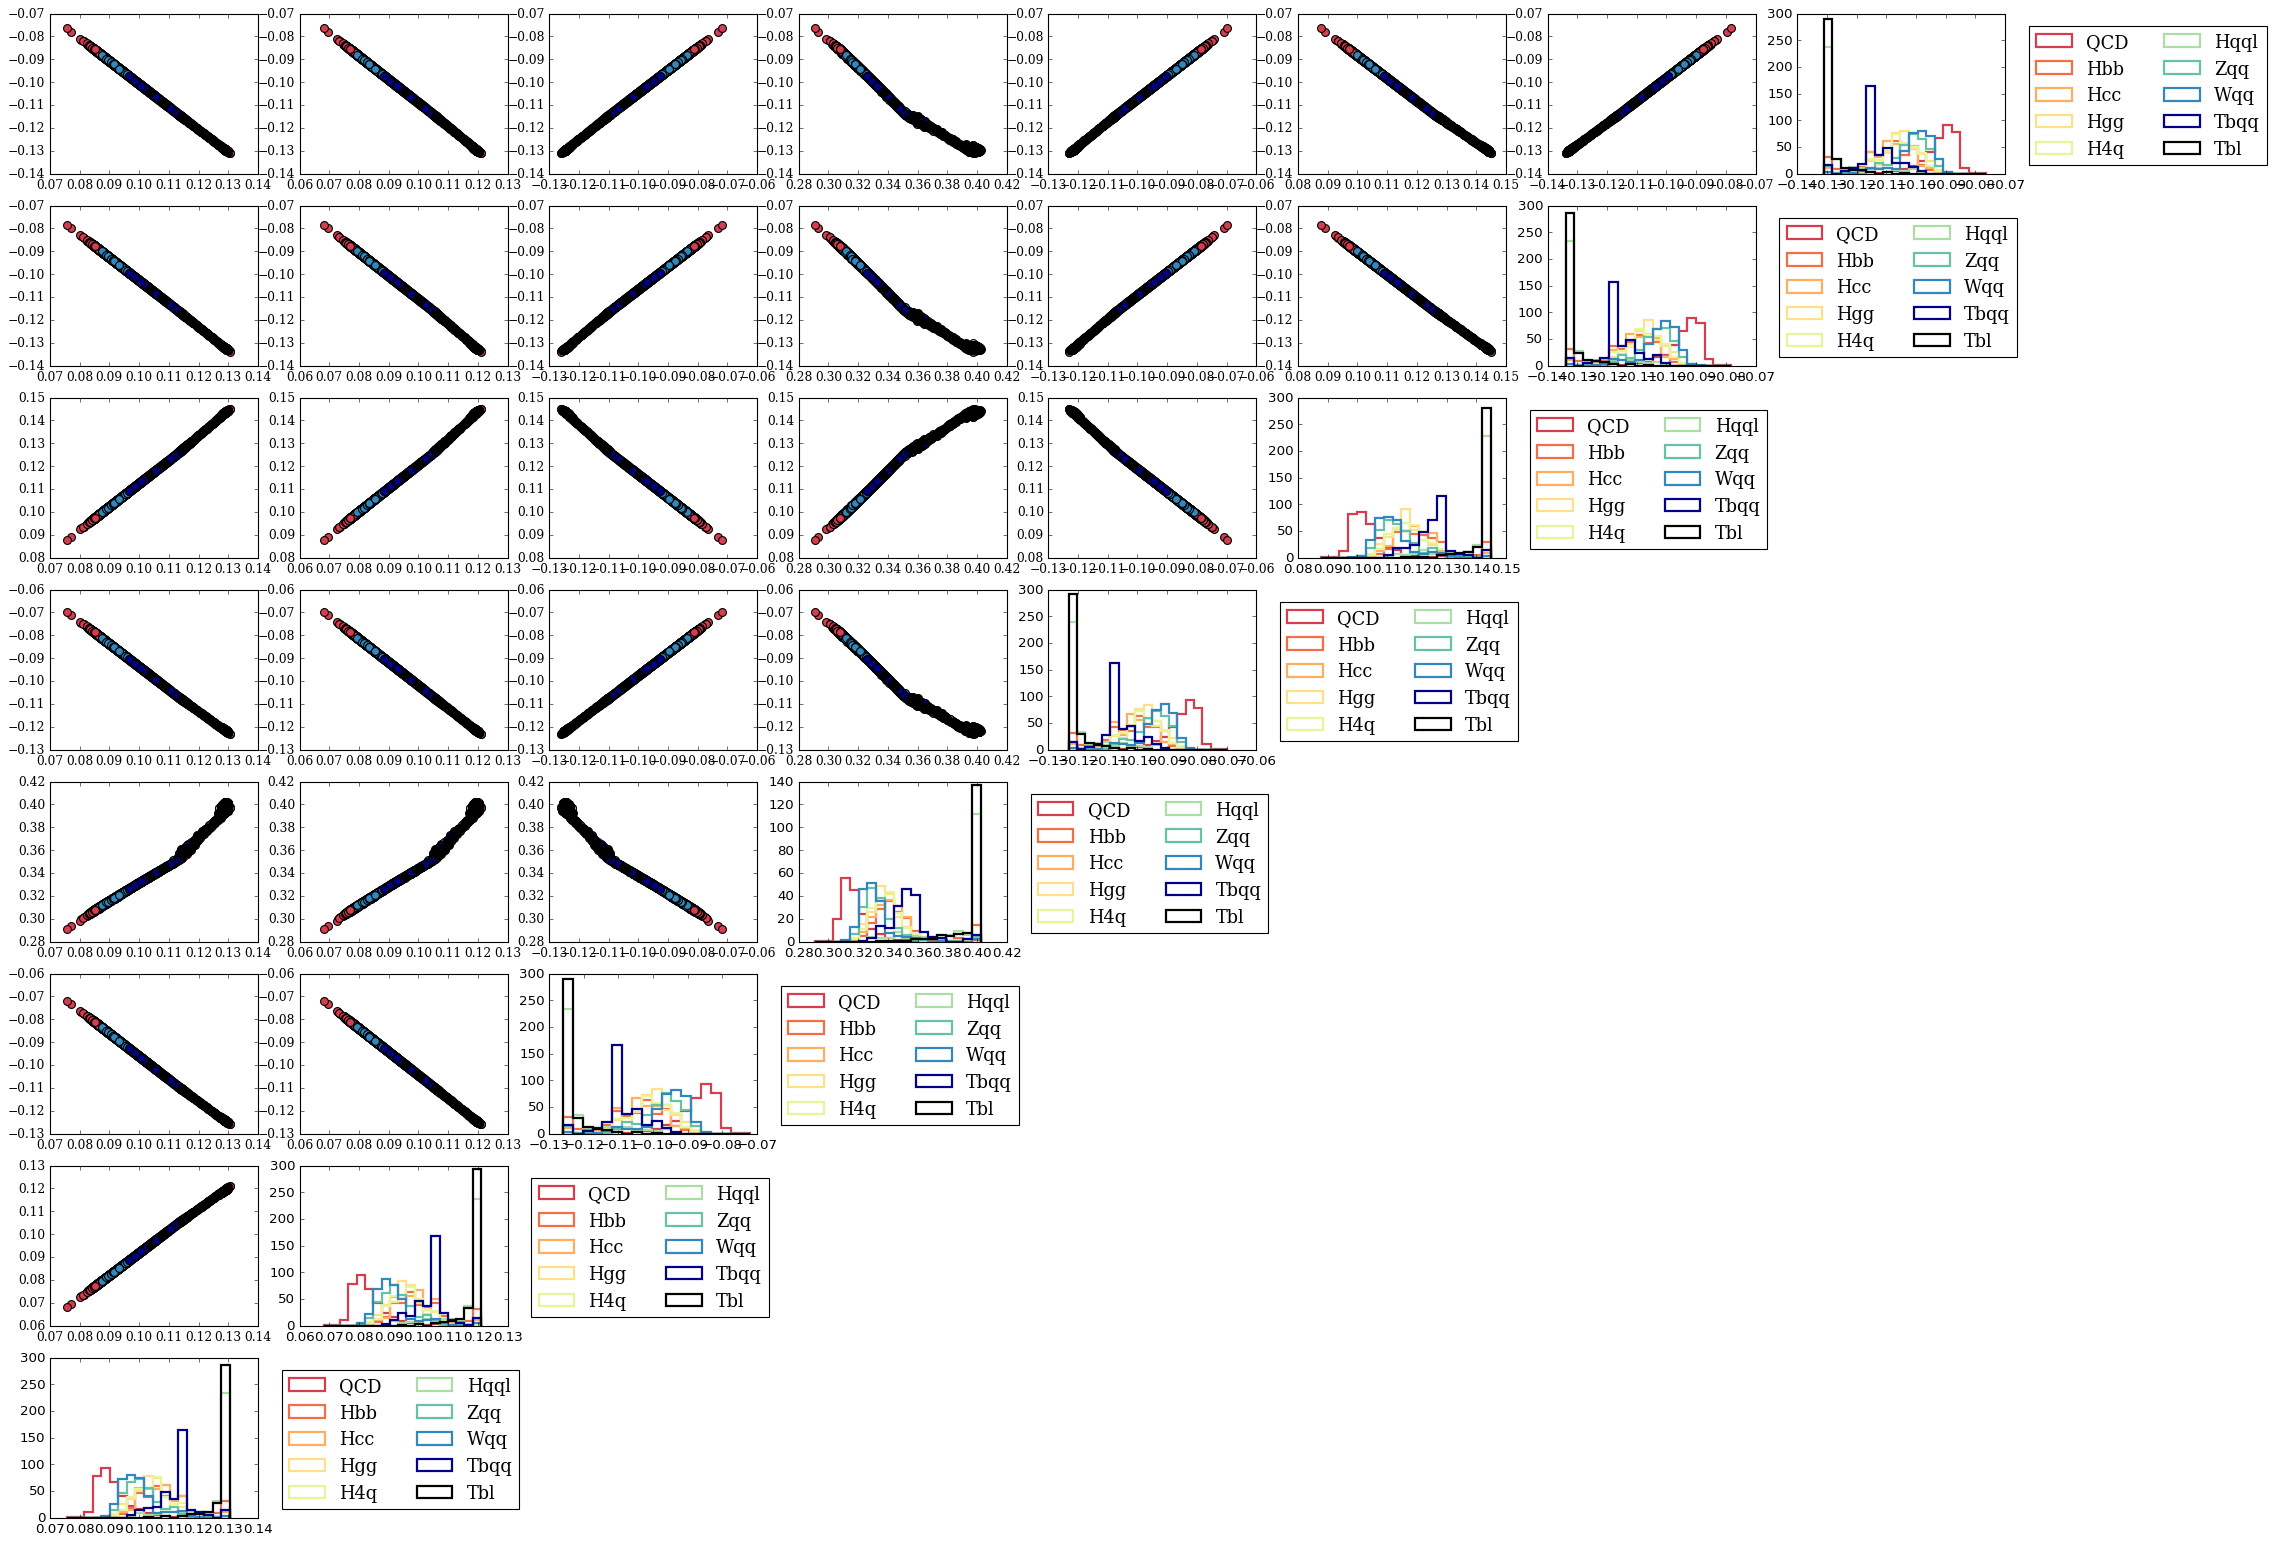

In [51]:
manifold = 'h_8'
geom = 'PoincareBall'
fig  = plt.figure(figsize=(26, 20))
fig.patch.set_facecolor('white')
N = 5000
y = data[manifold]['labels']['labels'][:N]
for i in range(data[manifold][geom]['latent'].shape[1]):
    x_i = data[manifold][geom]['latent'][:N, i]
    for j in range(data[manifold][geom]['latent'].shape[1]):
        if j>i:
            x_j = data[manifold][geom]['latent'][:N, j]
            ax= fig.add_axes([0.05+i*0.12, 0.05+j*0.12, 0.10, 0.10])
            plt.yticks(fontsize=11, fontname='serif')
            plt.xticks(fontsize=11, fontname='serif')
            for l in labels_tests:
                plt.scatter(x_i[y==int(l)], x_j[y==int(l)], c=colors[int(l)], s=50,
                   )
        elif i==j:
            ax= fig.add_axes([0.05+i*0.12, 0.05+j*0.12, 0.1, 0.1])
            bins = np.linspace(np.min(x_i), np.max(x_i), 20)
            for l in labels_tests:
                plt.hist(x_i[y==int(l)], density=True,
                         histtype='step', lw=2, 
                         color=colors[int(l)],bins=bins, label='%s'%(labels_physics[int(l)]))
            plt.legend(prop=font, ncol=2, bbox_to_anchor=(2.3, 0.98), bbox_transform=ax.transAxes)
        else: continue
plt.savefig('./higgsAD_%s_%s_latent.png'%(manifold, geom))
plt.show()

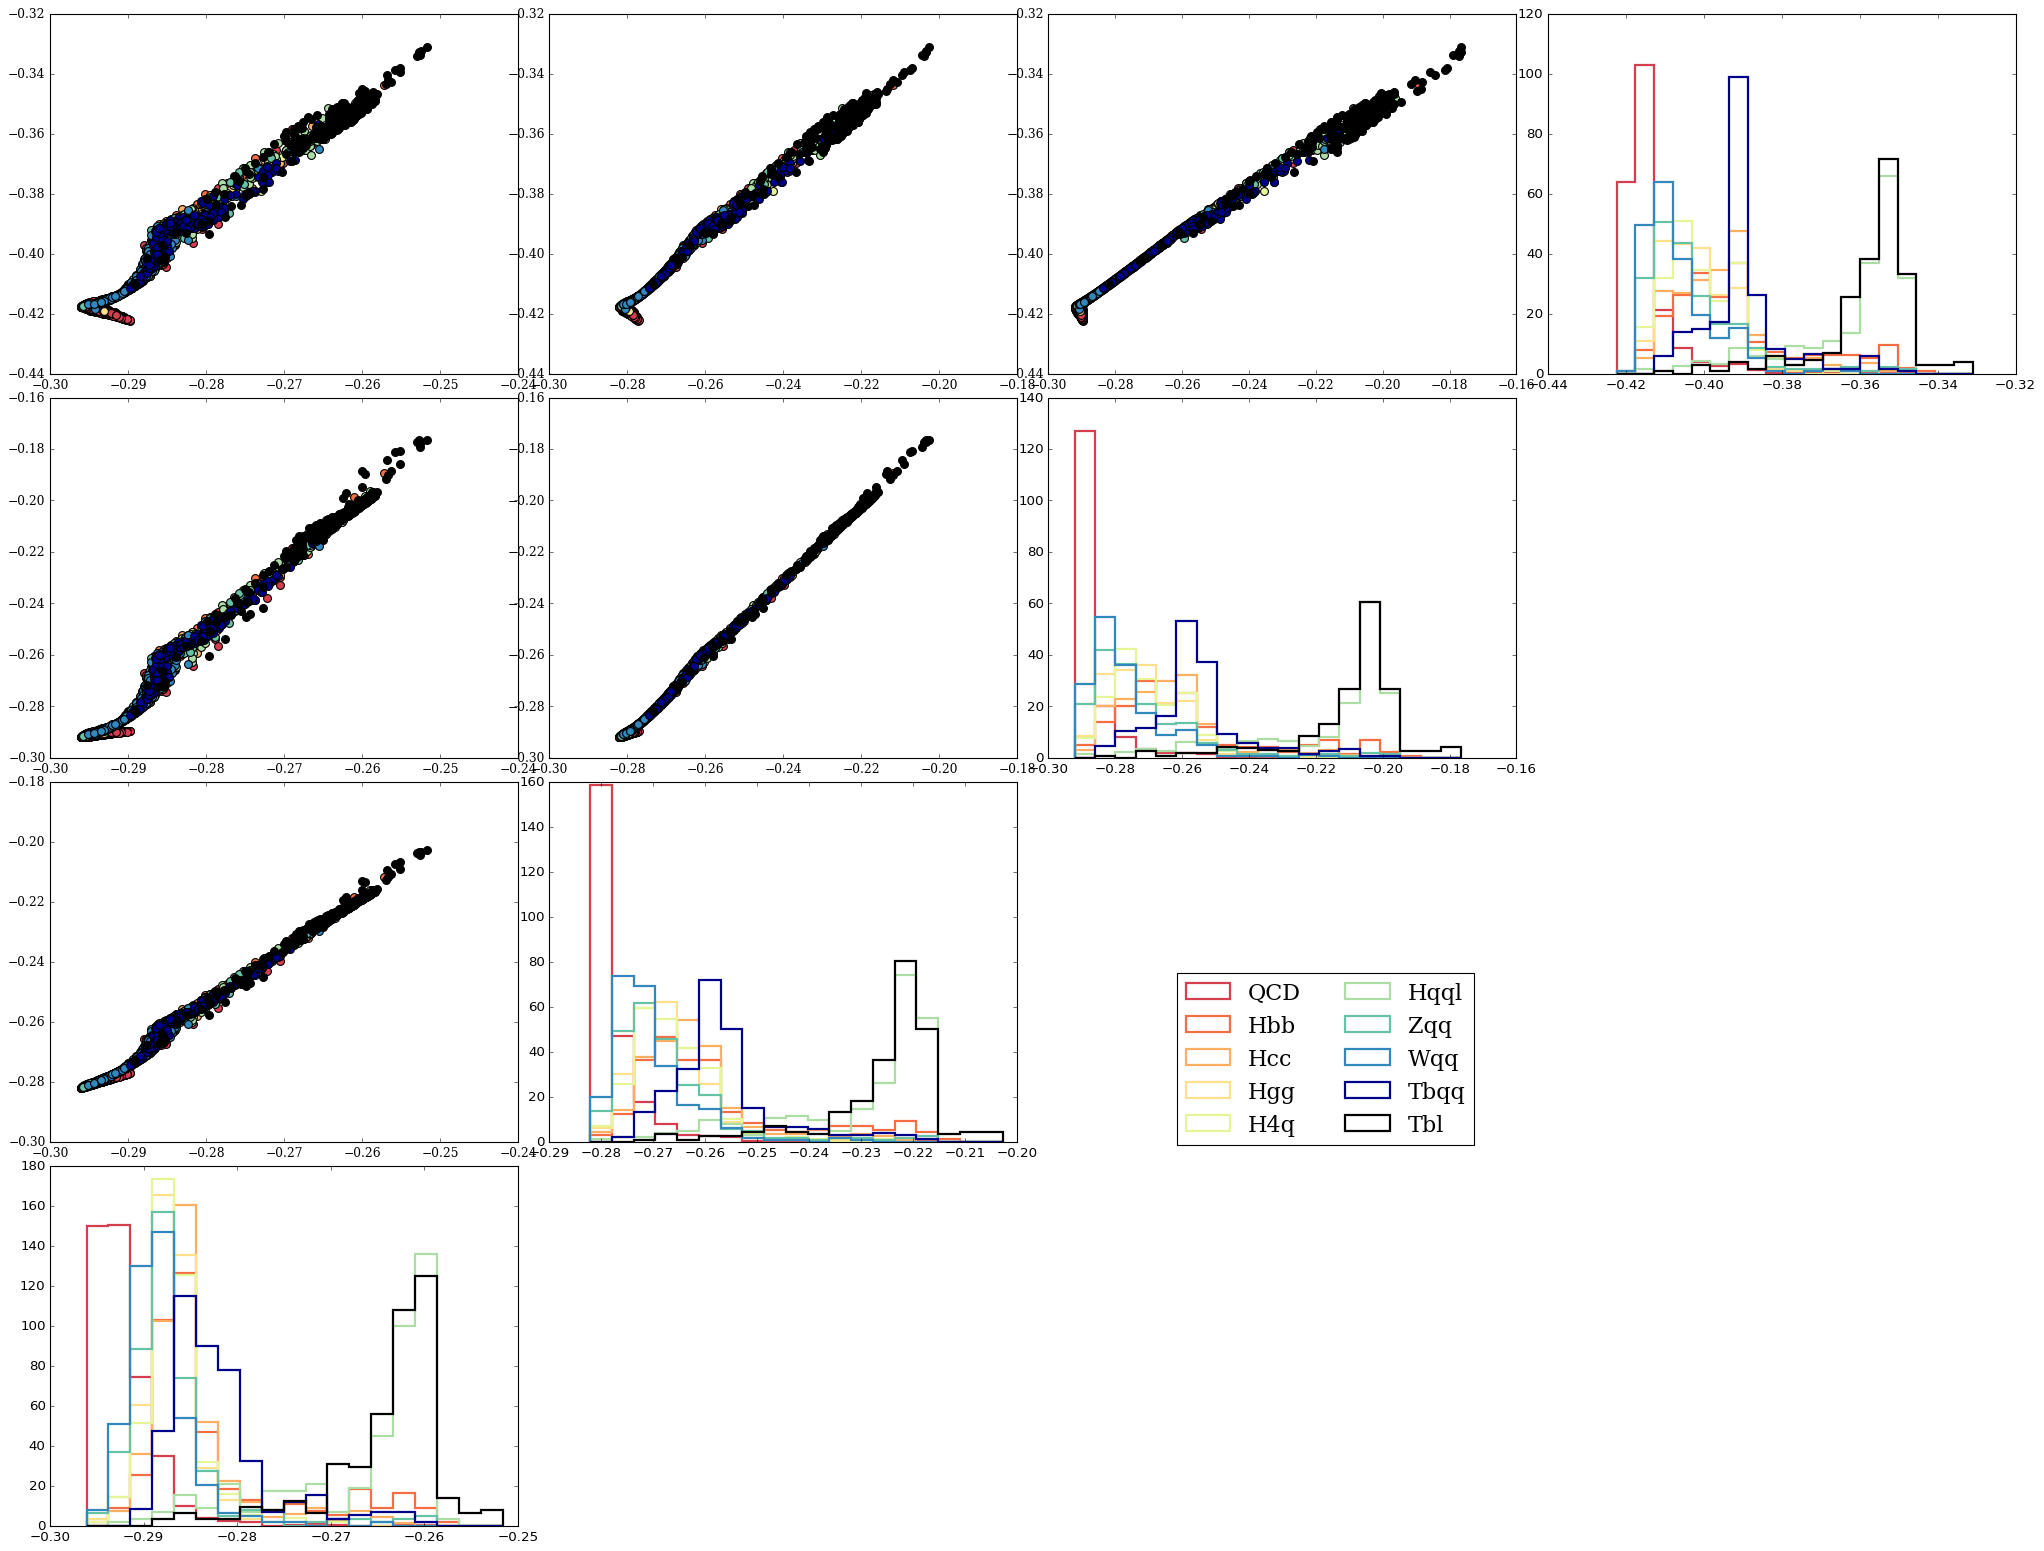

In [62]:
manifold = 'h_4'
geom = 'PoincareBall'
fig  = plt.figure(figsize=(26, 20))
fig.patch.set_facecolor('white')
N = 5000
y = data[manifold]['labels']['labels'][:N]
dim = data[manifold][geom]['latent'].shape[1]
font = font_manager.FontProperties(family='serif', size=20)
for i in range(dim):
    x_i = data[manifold][geom]['latent'][:N, i]
    for j in range(dim):
        if j>i:
            x_j = data[manifold][geom]['latent'][:N, j]
            ax= fig.add_axes([0.02+i*0.96/dim, 0.02+j*0.96/dim, 0.90/dim, 0.90/dim])
            plt.yticks(fontsize=11, fontname='serif')
            plt.xticks(fontsize=11, fontname='serif')
            for l in labels_tests:
                plt.scatter(x_i[y==int(l)], x_j[y==int(l)], c=colors[int(l)], s=50,
                   )
        elif i==j:
            ax= fig.add_axes([0.02+i*0.96/dim, 0.02+j*0.96/dim, 0.90/dim, 0.90/dim])
            bins = np.linspace(np.min(x_i), np.max(x_i), 20)
            for l in labels_tests:
                plt.hist(x_i[y==int(l)], density=True,
                         histtype='step', lw=2, 
                         color=colors[int(l)],bins=bins, label='%s'%(labels_physics[int(l)]))
            if j==int(dim/2-1):
                plt.legend(prop=font, ncol=2, bbox_to_anchor=(2, 0.5), bbox_transform=ax.transAxes)
        else: continue
plt.savefig('./higgsAD_%s_%s_latent.png'%(manifold, geom))
plt.show()

# plot Backgroung vs. Anomaly

In [14]:
colors= [
    '#3288bd',
'#f46d43',
'#fdae61',
'#fee08b',
'#e6f598',
'#abdda4',
    '#3288bd',
    '#3288bd',
    '#3288bd',
    '#3288bd',
]
labels_tests = [0, 6, 7, 8, 9, 1, 2, 3, 4, 5]
labels_tests = [str(i) for i in labels_tests]

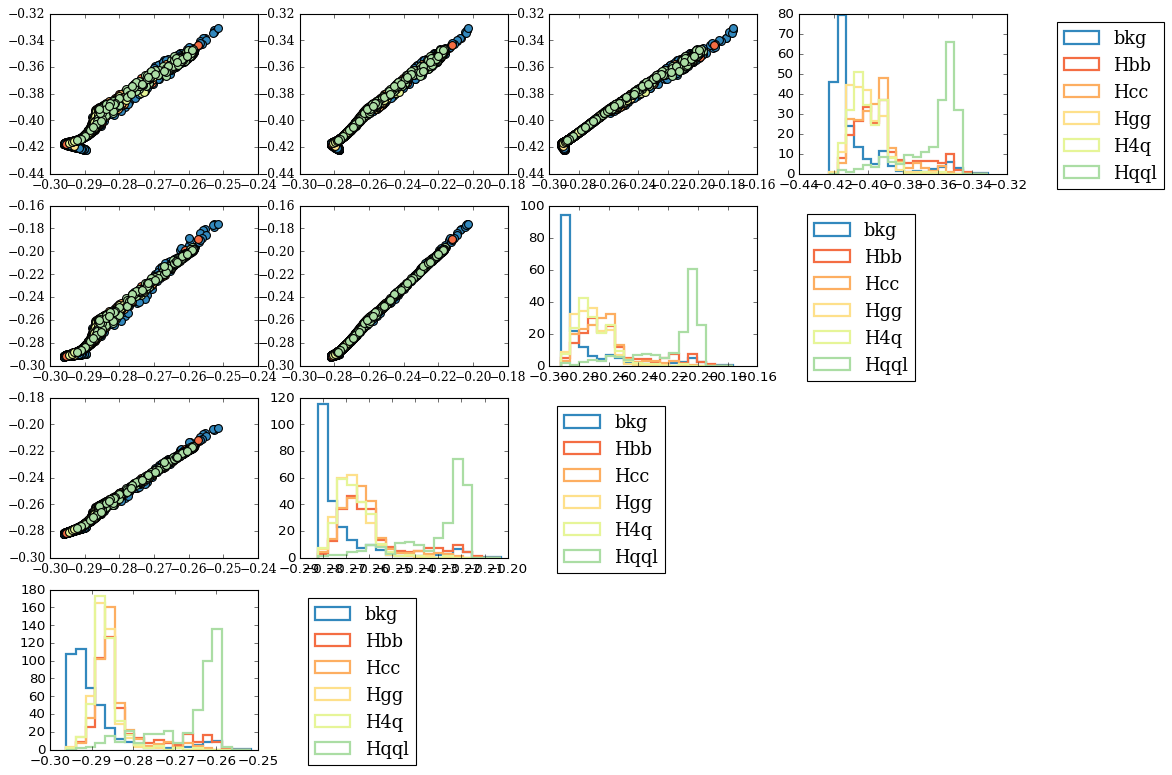

In [15]:
manifold = 'h_4'
geom = 'PoincareBall'
fig  = plt.figure(figsize=(26, 20))
fig.patch.set_facecolor('white')
N = 5000
bins = np.linspace(-1.5, 1., 20)
y = data[manifold]['labels']['labels'][:N]
for i in range(int(data[manifold][geom]['latent'].shape[1])):
    x_i = data[manifold][geom]['latent'][:N, i]
    for j in range(int(data[manifold][geom]['latent'].shape[1])):
        if j>i:
            x_j = data[manifold][geom]['latent'][:N, j]
            ax= fig.add_axes([0.05+i*0.12, 0.05+j*0.12, 0.10, 0.10])
            plt.yticks(fontsize=11, fontname='serif')
            plt.xticks(fontsize=11, fontname='serif')
            for l in labels_tests:
                plt.scatter(x_i[y==int(l)], x_j[y==int(l)], c=colors[int(l)], s=50,
                   )
        elif i==j:
            ax= fig.add_axes([0.05+i*0.12, 0.05+j*0.12, 0.1, 0.1])
            bins = np.linspace(np.min(x_i), np.max(x_i), 20)
            plt.hist(x_i[((y==0)+(y>5))>0], density=True,
                     histtype='step', lw=2, 
                     color=colors[0],bins=bins, label='bkg')
            plt.hist(x_i[y==1], density=True,
                     histtype='step', lw=2, 
                     color=colors[1],bins=bins, label='%s'%(labels_physics[1]))
            plt.hist(x_i[y==2], density=True,
                     histtype='step', lw=2, 
                     color=colors[2],bins=bins, label='%s'%(labels_physics[2]))
            plt.hist(x_i[y==3], density=True,
                     histtype='step', lw=2, 
                     color=colors[3],bins=bins, label='%s'%(labels_physics[3]))
            plt.hist(x_i[y==4], density=True,
                     histtype='step', lw=2, 
                     color=colors[4],bins=bins, label='%s'%(labels_physics[4]))
            plt.hist(x_i[y==5], density=True,
                     histtype='step', lw=2, 
                     color=colors[5],bins=bins, label='%s'%(labels_physics[5]))
            plt.legend(prop=font, ncol=1, bbox_to_anchor=(1.8, 1), bbox_transform=ax.transAxes)
        else: continue
plt.savefig('./higgsAD_%s_%s_latent_anomlaies.png'%(manifold, geom))
plt.show()